In [194]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Plots LaTeX-Style
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'

In [195]:
T = 1
h = 0.1
n = int(T/h) + 1

A = np.array([[0, 1], [-1, 0]])
C = np.array([1, 0]) # z = x
x0 = np.array([1, 1])

x_var = 0.1
z_var = 0.1
Q = np.array([[x_var, 0], [0, x_var]])
R = np.array([z_var])

In [196]:
x_real = np.zeros((n, 2))
x_real[0] = x0
for i in range(1, n):
    x_real[i] = x_real[i-1] + h * A @ x_real[i-1]

x_pred = np.zeros((n, 2))
Cov_pred = np.zeros((n, 2, 2))

x_pred[0] = x0
Cov_pred[0] = Q

x_filt = np.zeros((n, 2))
Cov_filt = np.zeros((n, 2, 2))

x_filt[0] = x0
Cov_filt[0] = Q

z = np.zeros(n)
z[0] = C @ x0 + R * np.random.normal()

In [197]:
for i in range(1, n):
    x_pred[i] = A @ x_pred[i-1]
    Cov_pred[i] = A @ Cov_pred[i-1] @ A.T + Q

    z[i] = C @ x_real[i] + R * np.random.normal()

    K = Cov_pred[i] @ C.T * 1/(C @ Cov_pred[i] @ C.T + R)
    x_filt[i] = x_pred[i] + K * (z[i] - C @ x_pred[i])
    Cov_filt[i] = Cov_pred[i] - K * (C @ Cov_pred[i])

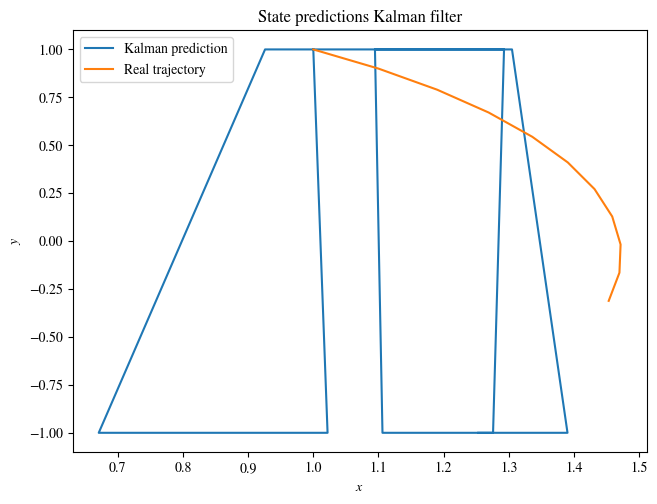

In [198]:
fig, ax = plt.subplots()
fig.tight_layout()

ax.plot(x_filt[:,0], x_filt[:,1], label='Kalman prediction')
ax.plot(x_real[:,0], x_real[:,1], label='Real trajectory')

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_title('State predictions Kalman filter')
ax.legend()
plt.savefig('HW3_2_Kalman.png', dpi=300)
plt.show()